In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing datasets
digimon = pd.read_csv("/content/DigiDB_digimonlist.csv", index_col=0)
moves = pd.read_csv("/content/DigiDB_movelist.csv")

In [4]:
digimon.head()

,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
Number,,,,,,,,,,,,
1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [5]:
digimon.shape

(249, 12)

In [6]:
digimon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 1 to 249
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Digimon      249 non-null    object
 1   Stage        249 non-null    object
 2   Type         249 non-null    object
 3   Attribute    249 non-null    object
 4   Memory       249 non-null    int64 
 5   Equip Slots  249 non-null    int64 
 6   Lv 50 HP     249 non-null    int64 
 7   Lv50 SP      249 non-null    int64 
 8   Lv50 Atk     249 non-null    int64 
 9   Lv50 Def     249 non-null    int64 
 10  Lv50 Int     249 non-null    int64 
 11  Lv50 Spd     249 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 25.3+ KB


In [7]:
digimon.describe()

,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,1.574297,1210.883534,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,0.854012,326.102384,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,0.000000,530.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,1.000000,990.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,1.000000,1180.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,2.000000,1480.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,3.000000,2080.000000,203.000000,318.000000,213.000000,233.000000,218.000000


In [8]:
def slug_columns(df, test=True):
    if test:
        df_copy = df
        df_copy.rename(lambda col: "_".join(col.lower().split()), axis="columns", inplace=True)
        print(df_copy.columns)
    else:
        df.rename(lambda col: "_".join(col.lower().split()), axis="columns", inplace=True)
        print(df.columns)

#Test

In [9]:
numeric_digimon = digimon.select_dtypes(include = np.number)

corr = numeric_digimon.corr()
corr

,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
Memory,1.000000,0.355176,0.639569,0.623400,0.608372,0.611728,0.583956,0.797777
Equip Slots,0.355176,1.000000,0.392137,0.278687,0.211450,0.466534,0.237616,0.286558
Lv 50 HP,0.639569,0.392137,1.000000,0.070957,0.605708,0.561376,0.055314,0.317051
Lv50 SP,0.623400,0.278687,0.070957,1.000000,-0.148365,0.169960,0.895652,0.603240
Lv50 Atk,0.608372,0.211450,0.605708,-0.148365,1.000000,0.426901,-0.186125,0.522005
Lv50 Def,0.611728,0.466534,0.561376,0.169960,0.426901,1.000000,0.182606,0.225921
Lv50 Int,0.583956,0.237616,0.055314,0.895652,-0.186125,0.182606,1.000000,0.442214
Lv50 Spd,0.797777,0.286558,0.317051,0.603240,0.522005,0.225921,0.442214,1.000000


In [10]:
digimon.columns

Index(['Digimon', 'Stage', 'Type', 'Attribute', 'Memory', 'Equip Slots',
       'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def', 'Lv50 Int', 'Lv50 Spd'],
      dtype='object')

In [11]:
slug_columns(digimon)
digimon.rename({"lv_50_hp": "lv50_hp"}, inplace=True, axis="columns")
digimon.columns

Index(['digimon', 'stage', 'type', 'attribute', 'memory', 'equip_slots',
       'lv_50_hp', 'lv50_sp', 'lv50_atk', 'lv50_def', 'lv50_int', 'lv50_spd'],
      dtype='object')


Index(['digimon', 'stage', 'type', 'attribute', 'memory', 'equip_slots',
       'lv50_hp', 'lv50_sp', 'lv50_atk', 'lv50_def', 'lv50_int', 'lv50_spd'],
      dtype='object')

In [12]:
digimon.head()

,digimon,stage,type,attribute,memory,equip_slots,lv50_hp,lv50_sp,lv50_atk,lv50_def,lv50_int,lv50_spd
Number,,,,,,,,,,,,
1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [13]:
stage_by_lv_hp = digimon.groupby("stage")["lv50_hp"].agg(["min", "mean", "median", "max"])
stage_by_lv_hp.reset_index(inplace=True)
stage_by_lv_hp

,stage,min,mean,median,max
0,Armor,1130,1170.000000,1140.0,1240
1,Baby,540,728.000000,690.0,950
2,Champion,590,1087.037037,1130.0,1480
3,In-Training,540,844.545455,930.0,1040
4,Mega,790,1455.405405,1480.0,2080
5,Rookie,530,920.526316,960.0,1230
6,Ultimate,790,1286.896552,1285.0,1980
7,Ultra,1080,1508.333333,1510.0,1780


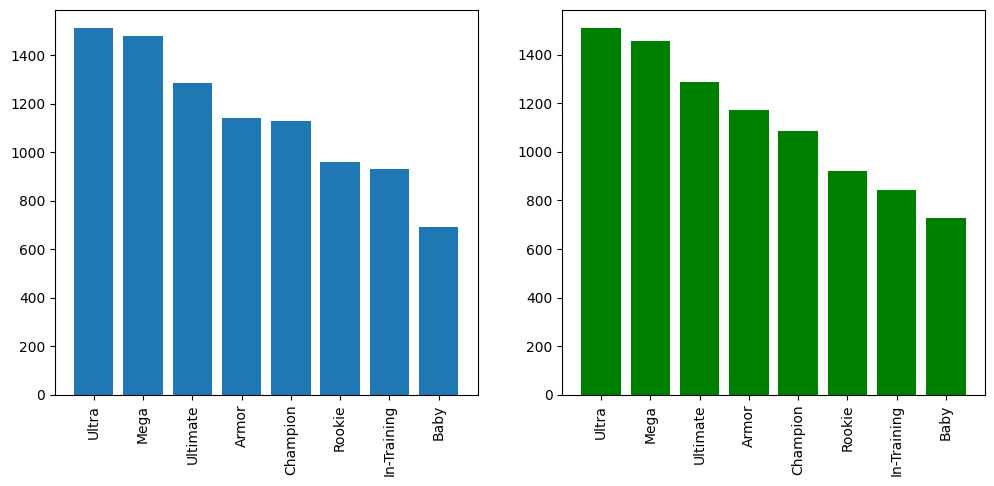

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.bar("stage","median", data=stage_by_lv_hp.sort_values("median",ascending=False))
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.bar("stage","mean", data=stage_by_lv_hp.sort_values("mean",ascending=False),color="green")
plt.show()

#Which set of moves will get the best ratio of attack power to SP spent?

In order to see the best set of moves with attack power, per SP lost, we need to:

Combine the moves into one, and add their attacks and SP lost
See which one does the most damage with the least SP spent.
In fact, it was to do the power/sp_cost... *facepalm

In [15]:
moves.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95..."
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95..."
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9..."
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a..."
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a..."


In [16]:
slug_columns(moves)

Index(['move', 'sp_cost', 'type', 'power', 'attribute', 'inheritable',
       'description'],
      dtype='object')


In [17]:
moves.head()

,move,sp_cost,type,power,attribute,inheritable,description
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95..."
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95..."
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9..."
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a..."
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a..."


In [18]:
moves["best_ratio"] = round(moves.power/moves.sp_cost)
moves.sort_values("best_ratio",ascending=False)

,move,sp_cost,type,power,attribute,inheritable,description,best_ratio
80,Heavy Strike I,3,Physical,70,Neutral,Yes,"Physical attack, 70 Neutral damage to one foe....",23.0
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95...",22.0
40,Comet Hammer I,3,Physical,65,Earth,Yes,"Physical attack, 65 Earth damage to one foe. 9...",22.0
50,Wind Claw I,3,Physical,65,Wind,Yes,"Physical attack, 65 Wind damage to one foe. 95...",22.0
30,Nanomachine Break I,3,Physical,65,Thunder,Yes,"Physical attack, 65 Thunder damage to one foe....",22.0
...,...,...,...,...,...,...,...,...
96,X-Aura,25,Support,0,Neutral,Yes,Restores HP for all party members.,0.0
95,Aura,10,Support,0,Neutral,Yes,Restores a little HP for all party members.,0.0
94,Final Heal,16,Support,0,Neutral,Yes,Restores a lot of HP for one party member.,0.0
125,Mental Break Field,20,Support,0,Neutral,Yes,Reduces INT of all enemies by 10%.,0.0


#Which team of 3 digimon have the highest attack? Defense?



*   Sort values by lv50_atk
*   Sort values by lv50_def




In [20]:
digimon.head(3)

,digimon,stage,type,attribute,memory,equip_slots,lv50_hp,lv50_sp,lv50_atk,lv50_def,lv50_int,lv50_spd
Number,,,,,,,,,,,,
1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75


In [21]:
best_atk_team = digimon.sort_values("lv50_atk" , ascending=False).head(3)
best_atk_team

,digimon,stage,type,attribute,memory,equip_slots,lv50_hp,lv50_sp,lv50_atk,lv50_def,lv50_int,lv50_spd
Number,,,,,,,,,,,,
244,Chaosmon,Ultra,Vaccine,Neutral,25,2,1080,129,318,94,89,188
236,Belphemon RM,Ultra,Virus,Dark,25,0,1780,84,247,168,109,140
196,Diaboromon,Mega,Free,Dark,20,2,1680,114,243,104,79,173


In [23]:
best_def_team = digimon.sort_values("lv50_def" , ascending=False).head(3)
best_def_team

,digimon,stage,type,attribute,memory,equip_slots,lv50_hp,lv50_sp,lv50_atk,lv50_def,lv50_int,lv50_spd
Number,,,,,,,,,,,,
182,GroundLocomon,Mega,Data,Electric,18,3,1140,114,144,213,133,128
183,Craniamon,Mega,Vaccine,Earth,22,1,1630,143,124,208,134,124
239,Magnamon,Armor,Free,Earth,22,2,1240,124,168,208,148,124


#What’s the tradeoff between HP and SP?

In [24]:
digimon.head()

,digimon,stage,type,attribute,memory,equip_slots,lv50_hp,lv50_sp,lv50_atk,lv50_def,lv50_int,lv50_spd
Number,,,,,,,,,,,,
1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [27]:
trade_off_hp_sp = (digimon.lv50_hp / digimon.lv50_sp) / 2
trade_off_hp_sp

,0
Number,
1,3.831169
2,7.661290
3,8.700000
4,5.073529
5,2.755102
...,...
245,4.784173
246,8.684211
247,5.806452


#Are some types over- or under-represented?

In [28]:
digimon.type.unique()

array(['Free', 'Vaccine', 'Virus', 'Data'], dtype=object)

In [30]:
digimon.head(3)

,digimon,stage,type,attribute,memory,equip_slots,lv50_hp,lv50_sp,lv50_atk,lv50_def,lv50_int,lv50_spd
Number,,,,,,,,,,,,
1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75


In [37]:
# Count occurrences of each type
type_counts = digimon["type"].value_counts()

# Calculate the average count across all types
average_count = type_counts.mean()
average_count



62.25

In [38]:
# Identify over- and under-represented types by comparing to the average
over_represented = type_counts[type_counts > average_count]
under_represented = type_counts[type_counts < average_count]

type_counts, average_count, over_represented, under_represented

(type
 Virus      82
 Vaccine    70
 Data       60
 Free       37
 Name: count, dtype: int64,
 62.25,
 type
 Virus      82
 Vaccine    70
 Name: count, dtype: int64,
 type
 Data    60
 Free    37
 Name: count, dtype: int64)

In [45]:
types = digimon.groupby("type").mean(numeric_only=True).sort_values("lv50_hp", ascending=False)
types

,memory,equip_slots,lv50_hp,lv50_sp,lv50_atk,lv50_def,lv50_int,lv50_spd
type,,,,,,,,
Virus,12.597561,1.695122,1271.951220,110.378049,130.439024,121.573171,114.963415,117.390244
Vaccine,13.371429,1.571429,1231.571429,115.071429,128.371429,120.014286,117.942857,128.285714
Data,12.166667,1.850000,1198.833333,113.600000,120.366667,117.150000,118.966667,124.716667
Free,7.729730,0.864865,1055.945946,92.243243,110.837838,96.729730,87.189189,105.162162


In [46]:
import plotly.express as px
types_fig = px.bar(types, x=types.index, y=["lv50_hp", "lv50_sp", "lv50_atk", "lv50_def"], width=600)
types_fig.show()

#Both the moves and support skills have short text descriptions. Can an NLP analysis reveal underlying clusters of moves?

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords

# Sample DataFrame
Supp = pd.read_csv("/content/DigiDB_supportlist.csv") # Removed extra space

Supp.head(3)

,Name,Description
0,Adroit Wisdom,Increases INT by 15%.
1,All-Rounder,"Increases ATK, DEF, INT and SPD by 5%."
2,Analyze,Increases scan values by 10%.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


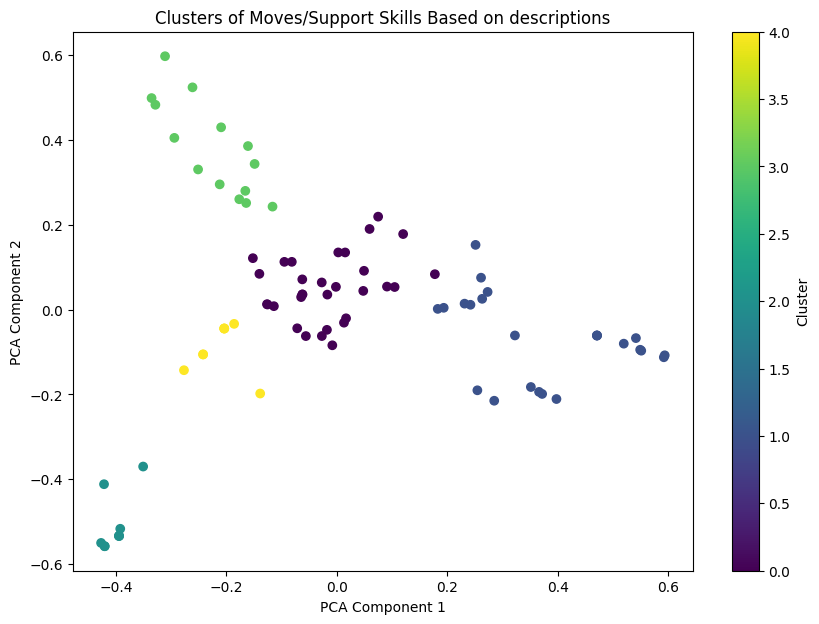

In [62]:
# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 1. Preprocess Text
def preprocess_text(text):
    # Lowercase, remove punctuation, and stop words
    text = text.lower()
    text = "".join([char for char in text if char.isalnum() or char.isspace()])
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply preprocessing
Supp['Cleaned_description'] = Supp['Description'].apply(preprocess_text)

# 2. Convert Text to Numerical Features (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(Supp['Cleaned_description'])

# 3. Dimensionality Reduction (Optional for visualization)
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

# 4. Clustering with KMeans
kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust n_clusters based on your data
Supp['Cluster'] = kmeans.fit_predict(reduced_tfidf)

# 5. Visualize Clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=Supp['Cluster'], cmap='viridis')
plt.colorbar(label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Moves/Support Skills Based on descriptions")
plt.show()


#Are different types and attributes evenly represented across stages?

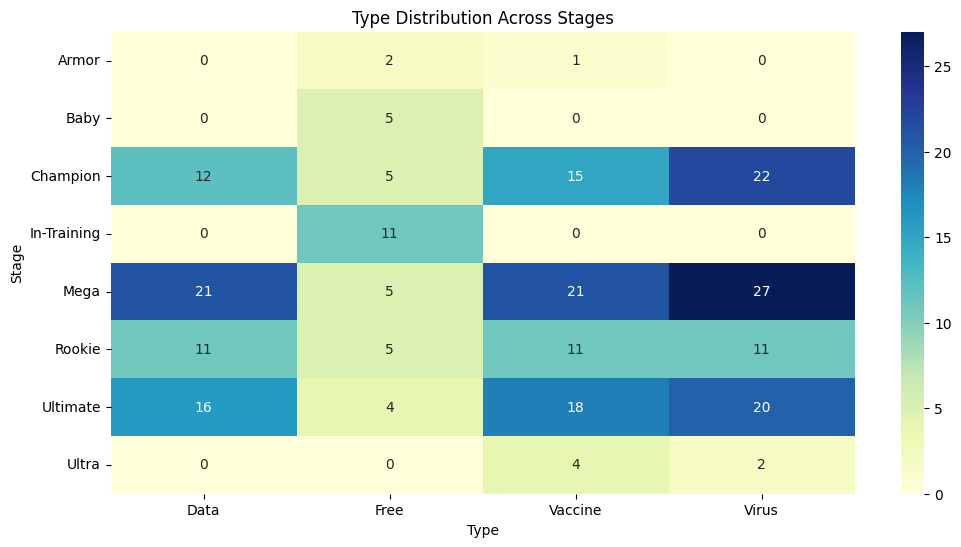

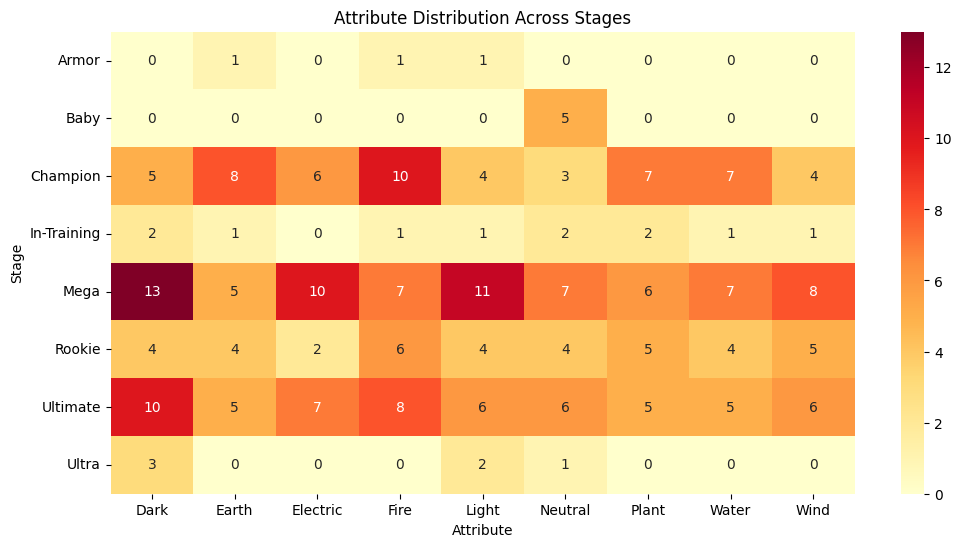

In [54]:
import seaborn as sns


# 1. Analyze Type Distribution Across Stages
type_stage_counts = digimon.groupby(["stage", "type"]).size().unstack(fill_value=0)

# 2. Analyze Attribute Distribution Across Stages
attribute_stage_counts = digimon.groupby(["stage", "attribute"]).size().unstack(fill_value=0)

# 3. Visualize Type Distribution Across Stages
plt.figure(figsize=(12, 6))
sns.heatmap(type_stage_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Type Distribution Across Stages")
plt.xlabel("Type")
plt.ylabel("Stage")
plt.show()

# 4. Visualize Attribute Distribution Across Stages
plt.figure(figsize=(12, 6))
sns.heatmap(attribute_stage_counts, annot=True, cmap="YlOrRd", fmt="d")
plt.title("Attribute Distribution Across Stages")
plt.xlabel("Attribute")
plt.ylabel("Stage")
plt.show()
